Using Cleveland dataset for heart disease, we process the data and try out different models from scikit learn to check their effectiveness

In [1]:
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 24.3MB/s]


<Figure size 1200x600 with 0 Axes>

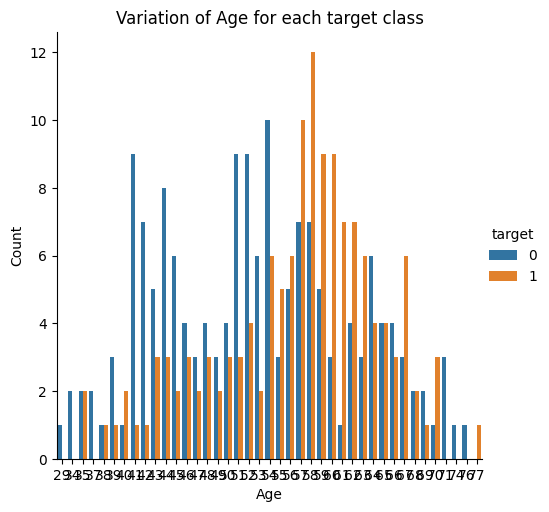

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
                'fbs', 'restecg', 'thalach', 'exang',
                'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0 , 1: 1 , 2: 1 , 3: 1 , 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age

# Your code here *******************************
plt.figure(figsize=(12,6))
sns.catplot(kind = 'count', data=df, x='age', hue = 'target')
plt.title('Variation of Age for each target class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

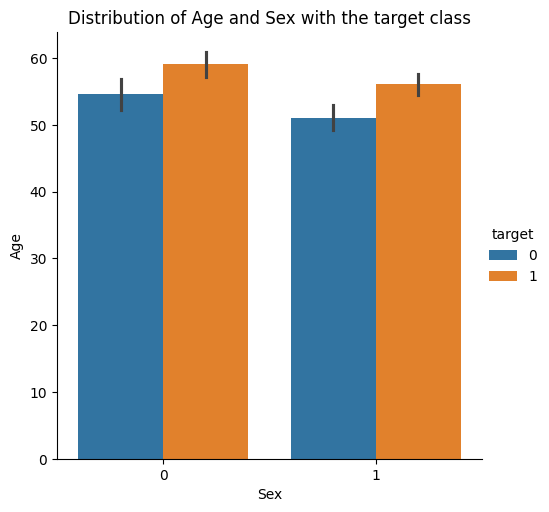

In [28]:
sns.catplot(kind = 'bar', data=df, y='age', x='sex', hue = 'target')
plt.title('Distribution of Age and Sex with the target class')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

In [29]:
X = df.iloc[:,: -1].values
y = df.iloc[:,-1].values

from sklearn . model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

# your code here ***************************
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1])/len( y_test ) ,2)
print ('Accuracy for training set for KNeighborsClassifier = {}'.format(
accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {} '.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69 


In [32]:
from sklearn import svm
classifier_svm = svm.SVC(kernel = 'rbf', random_state = 42)
classifier_svm.fit(X_train, y_train)

y_pred_train = classifier_svm.predict(X_train)
y_pred_test = classifier_svm.predict(X_test)


cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1])/len( y_test ) ,2)
print ('Accuracy for training set for SVM = {}'.format(
accuracy_for_train))
print('Accuracy for test set for SVM = {} '.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67 


In [35]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

y_pred_train = classifier_nb.predict(X_train)
y_pred_test = classifier_nb.predict(X_test)


cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1])/len( y_test ) ,2)
print ('Accuracy for training set for Naive Bayes = {}'.format(
accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {} '.format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84 


In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
classifier_dt.fit(X_train, y_train)

y_pred_train = classifier_dt.predict(X_train)
y_pred_test = classifier_dt.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1])/len( y_test ) ,2)
print ('Accuracy for training set for Decision Tree = {}'.format(
accuracy_for_train))
print('Accuracy for test set for Decision Tree = {} '.format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.74 


In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
classifier_rf.fit(X_train, y_train)

y_pred_train = classifier_rf.predict(X_train)
y_pred_test = classifier_rf.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1])/len( y_test ) ,2)
print ('Accuracy for training set for Random Forest = {}'.format(
accuracy_for_train))
print('Accuracy for test set for Random Forest = {} '.format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8 


In [39]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
classifier_ada.fit(X_train, y_train)

y_pred_train = classifier_ada.predict(X_train)
y_pred_test = classifier_ada.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1])/len( y_test ) ,2)
print ('Accuracy for training set for Adaboost = {}'.format(
accuracy_for_train))
print('Accuracy for test set for Adaboost = {} '.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84 


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,
random_state=42)
classifier_gb.fit(X_train, y_train)

y_pred_train = classifier_gb.predict(X_train)
y_pred_test = classifier_gb.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1])/len( y_test ) ,2)
print ('Accuracy for training set for Gradient Boosting = {}'.format(
accuracy_for_train))
print('Accuracy for test set for Gradient Boosting = {} '.format(accuracy_for_test))



Accuracy for training set for Gradient Boosting = 1.0
Accuracy for test set for Gradient Boosting = 0.85 


In [41]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
classifier_xgb.fit(X_train, y_train)

y_pred_train = classifier_xgb.predict(X_train)
y_pred_test = classifier_xgb.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1])/len( y_test ) ,2)
print ('Accuracy for training set for XGBoost = {}'.format(
accuracy_for_train))
print('Accuracy for test set for XGBoost = {} '.format(accuracy_for_test))



Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87 


In [43]:
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)
svc = svm.SVC(kernel = 'rbf', random_state = 42)
knn = KNeighborsClassifier()

clf = [('dt',dt),('rf',rf),('ada',ada),('gb',gb),('xgb',xgb),('svc',svc),('knn',knn)]
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(estimators = clf, final_estimator = xgb)
stack.fit(X_train, y_train)

y_pred_train = stack.predict(X_train)
y_pred_test = stack.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1])/len( y_test ) ,2)
print ('Accuracy for training set for Stacking = {}'.format(
accuracy_for_train))
print('Accuracy for test set for Stacking = {} '.format(accuracy_for_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.9 
